In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Cargar datos ---
df = pd.read_csv("datos.csv")  # columnas: timestamp_ms,RPM
df["t"] = (df["timestamp_ms"] - df["timestamp_ms"].iloc[0]) / 1000  # tiempo en segundos

# --- Aplicar media móvil de 5 puntos ---
df["rpm_suavizado"] = df["RPM"].rolling(window=5, min_periods=1).mean()

# --- Función modelo 1er orden con retardo ---
def modelo_primer_orden(t, K, tau, L):
    t_shift = t - L
    resp = K * (1 - np.exp(-t_shift / tau))
    resp[t < L] = 0
    return resp

# --- Ajustar modelo a datos suavizados ---
t = df["t"].values
y = df["rpm_suavizado"].values
p0 = [max(y), 1.0, 0.5]
params, _ = curve_fit(modelo_primer_orden, t, y, p0=p0)
K_fit, tau_fit, L_fit = params
y_modelo = modelo_primer_orden(t, K_fit, tau_fit, L_fit)

# --- Graficar comparación ---
plt.figure(figsize=(10, 6))
plt.plot(df["t"], df["RPM"], 'o--', label="RPM original")
plt.plot(df["t"], df["rpm_suavizado"], 'o-', label="Media móvil (5 puntos)")
plt.plot(df["t"], y_modelo, '--', label=f"Modelo 1er orden\nK={K_fit:.2f}, τ={tau_fit:.2f}, L={L_fit:.2f}s")
plt.xlabel("Tiempo (s)")
plt.ylabel("RPM")
plt.title("Respuesta del motor con media móvil y modelo ajustado")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#Caracterizacion de la curva

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde el archivo CSV
df = pd.read_csv('caracterizacion.csv')

# Convertir el tiempo a segundos (opcional)
df['Tiempo(s)'] = df['Tiempo(ms)'] / 1000.0

# Graficar la curva RPM vs tiempo
plt.figure(figsize=(10, 5))
plt.plot(df['Tiempo(s)'], df['RPM'], label='Respuesta del motor', color='blue')

# Estética del gráfico
plt.title('Curva de reacción del motor')
plt.xlabel('Tiempo (s)')
plt.ylabel('RPM')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'caracterizacion.csv'

In [ ]:
# Aplicar media móvil de 5 puntos
df['RPM_suavizado'] = df['RPM'].rolling(window=20, center=True).mean()

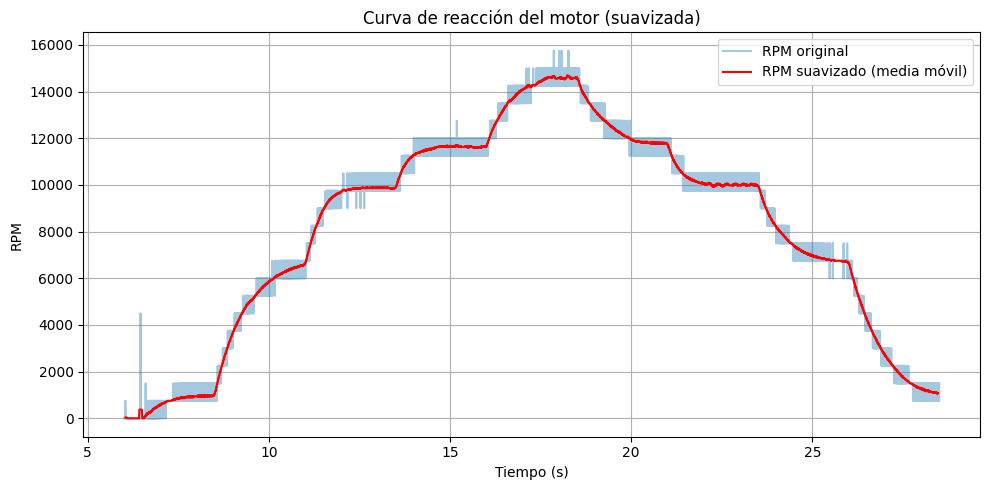

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Tiempo(s)'], df['RPM'], label='RPM original', alpha=0.4)
plt.plot(df['Tiempo(s)'], df['RPM_suavizado'], label='RPM suavizado (media móvil)', color='red')

plt.title('Curva de reacción del motor (suavizada)')
plt.xlabel('Tiempo (s)')
plt.ylabel('RPM')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


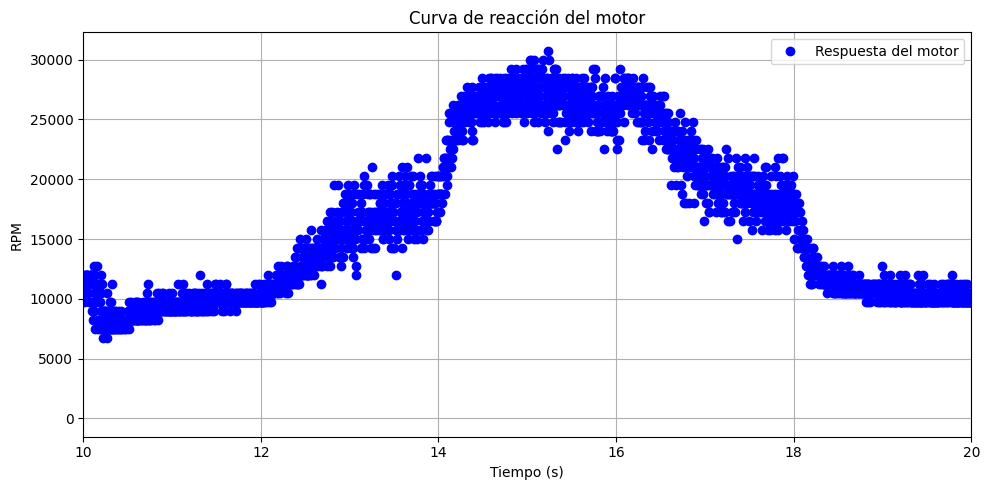

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde el archivo CSV
df = pd.read_csv('caracterizacion.csv')

# Convertir el tiempo a segundos (opcional)
df['Tiempo(s)'] = df['Tiempo(ms)'] / 1000.0

# Graficar la curva RPM vs tiempo
plt.figure(figsize=(10, 5))
plt.plot(df['Tiempo(s)'], df['RPM'],'o', label='Respuesta del motor', color='blue')
plt.xlim(10, 20)  # Limitar el eje x a 10 segundos
# Estética del gráfico
plt.title('Curva de reacción del motor')
plt.xlabel('Tiempo (s)')
plt.ylabel('RPM')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()


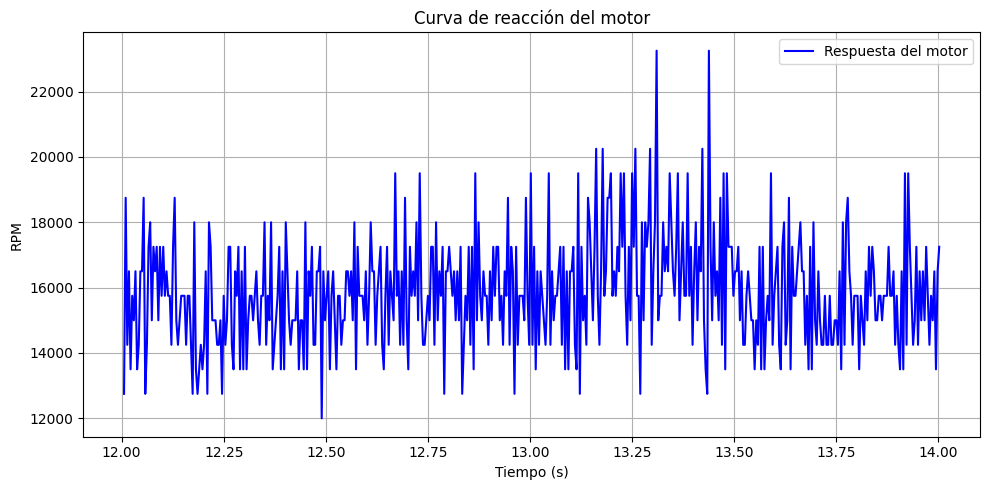

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde el archivo CSV
df = pd.read_csv('caracterizacion.csv')

# Convertir el tiempo a segundos (opcional)
df['Tiempo(s)'] = df['Tiempo(ms)'] / 1000.0

# Graficar la curva RPM vs tiempo
plt.figure(figsize=(10, 5))
plt.plot(df['Tiempo(s)'][1500:2000], df['RPM'][1500:2000], label='Respuesta del motor', color='blue')

# Estética del gráfico
plt.title('Curva de reacción del motor')
plt.xlabel('Tiempo (s)')
plt.ylabel('RPM')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [ ]:
df['Tiempo(s)'][:500]

,Tiempo(s)
0,6.006
1,6.010
2,6.014
3,6.018
4,6.022
...,...
495,7.986
496,7.990
497,7.994
498,7.998
